In [1]:
# Assignment: Support Vector Machines with bank data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve

In [2]:
# load in zip file
import zipfile

with zipfile.ZipFile("../bank.zip") as z:
    with z.open("bank.csv") as f:
        bank_data = pd.read_csv(f, sep=";")
        
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [3]:
bank_data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [4]:
# d. Extract the DataFrame column labeled "y" as your Y variable using
# list comprehension
target_data = np.array([1 if x=="yes" else 0 for x in bank_data['y']])

In [5]:
# e. Use the remaining columns into your X data. Convert the
# categorical data into numerical using get_dummies and then
# into a numpy array.

# get x_data using get_dummies as a numpy array
input_data = np.array(pd.get_dummies(bank_data.iloc[:,:-1]))

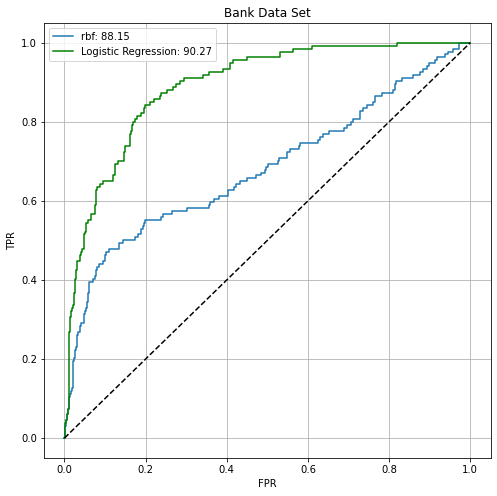

In [6]:
# f. Classify the data using SVM. Determine an accuracy and make an
# roc plot. Compare with other classification methods.

# train test split data
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data)

# classify with SVM
SVM = SVC(kernel="rbf", probability=True)
SVM.fit(x_train, y_train)
y_predicted = SVM.predict(x_test)
SVM_accuracy = accuracy_score(y_test, y_predicted)
proba = SVM.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, proba)

plt.plot(fpr,tpr, label="rbf: %.2f"%(SVM_accuracy*100))

# classify with logistic regression
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(x_train, y_train)
y_predicted = log_reg.predict(x_test)
log_accuracy = accuracy_score(y_test, y_predicted)
proba = log_reg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, proba)

plt.plot(fpr,tpr, c='g', label='Logistic Regression: %.2f'%(log_accuracy*100))


plt.plot([0,1],[0,1], ls='--', c='k')
plt.legend()
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Bank Data Set")
plt.gcf().set_size_inches(8,8)
plt.show()